# Zadanie 1.
Do danych z zadania 1 z zestawu nr 6 dopasuj regresje LASSO, opartą na 17 potęgach zniennej x. Użyj testowania krzyżowego(cross-validation), aby znaleźć najlepszy współczynnik alpha.


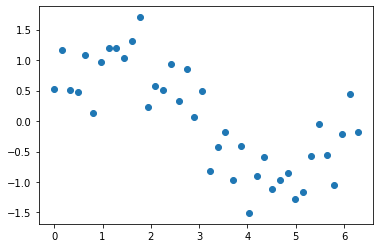

In [1]:
import numpy as np
x=np.linspace(0,2*np.pi,40)
y=np.sin(x)+np.random.normal(0,0.4,40)
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

x = x[np.newaxis].T
Y = y[np.newaxis].T
#print(x)

1.011002004008016


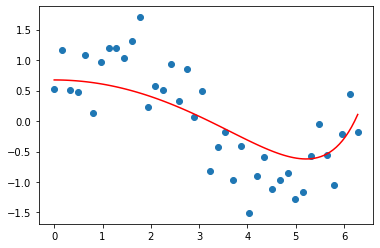

In [2]:
import sklearn.preprocessing as pr
import sklearn.linear_model as lm
import sklearn.model_selection as ms


X = pr.PolynomialFeatures(17).fit_transform(x)

#Xtrain, Xtest, Ytrain, Ytest = ms.train_test_split(X,Y, test_size = .5)

params = {'alpha': np.linspace(.01,10,500)}
best_lasso = ms.GridSearchCV(lm.Lasso(tol=.3), params)
best_lasso.fit(X,Y)

A = best_lasso.best_params_['alpha']
print(A)
model_1 = lm.Lasso(alpha=A,tol=.3).fit(X,Y)

X_lin = np.linspace(0,2*np.pi,100)
X_test = pr.PolynomialFeatures(17).fit_transform(X_lin[np.newaxis].T)
Y_test = model_1.predict(X_test)

plt.scatter(x,Y)
plt.plot(X_lin,Y_test,color='red')
plt.show()

# Zadanie 2
Dla dobrze znanych danych iris dopasuj model logistyczny bez regularyzacji oraz z regularyzacją $l_1$. Znajdź optymalny parametr regularyzacji używając testowania krzyżowego. Oba modele zobrazuj na odpowiednim rysunkiem oraz porównaj podstawowe charakterystyki modeli (wynikające z tabeli "True/False Positive/Negative").

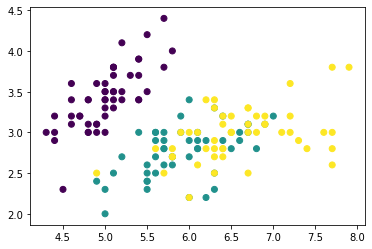

In [3]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Model bez regularyzacji

Macierz dezorientacji:
[[50  0  0]
 [ 0 38 12]
 [ 0 13 37]]
Czulosc: 0.8333333333333334
Dodatnia wartość predykcyjna: 0.8334000266773375
F1: 0.8333166649998333


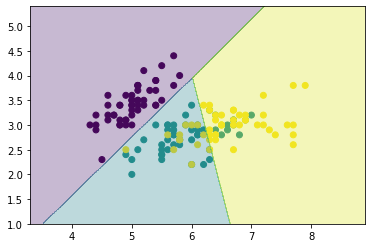

8.082727272727272
Model z regularyzacją

Macierz dezorientacji:
[[49  1  0]
 [ 2 23 25]
 [ 0  6 44]]
Czulosc: 0.7733333333333333
Dodatnia wartość predykcyjna: 0.7883773799374824
F1: 0.7615976093407658


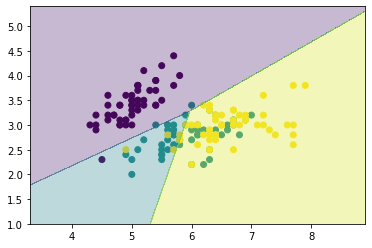

In [4]:
import sklearn.metrics as metrics

x1_min, x1_max = np.min(X[:,0])-1, np.max(X[:,0])+1
x2_min, x2_max = np.min(X[:,1])-1, np.max(X[:,1])+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

model2_noreg = lm.LogisticRegression(penalty='none').fit(X,y)
y_surf_noreg = model2_noreg.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)

y_pred_noreg = model2_noreg.predict(X)

ConMat_noreg = metrics.confusion_matrix(y, y_pred_noreg)
RecScor_noreg = metrics.recall_score(y,y_pred_noreg,average='macro')
PrecScor_noreg = metrics.precision_score(y,y_pred_noreg,average='macro')
F1Scor_noreg = metrics.f1_score(y,y_pred_noreg,average='macro')

print('Model bez regularyzacji')
print()

print('Macierz dezorientacji:')
print(ConMat_noreg)
print('Czulosc:', RecScor_noreg)
print('Dodatnia wartość predykcyjna:', PrecScor_noreg)
print('F1:', F1Scor_noreg)

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.contourf(xx1, xx2, y_surf_noreg, alpha=.3)
plt.show()

params = {'C': np.linspace(.01, 10, 100)}
model2_lasso = ms.GridSearchCV(lm.LogisticRegression(penalty='l1', solver='liblinear', tol=.2),params)
model2_lasso.fit(X,y)

C = model2_lasso.best_params_['C']
print(C)
model2_reg = lm.LogisticRegression(C=C, penalty='l1', solver='liblinear',tol=.1).fit(X,y)

y_surf_reg = model2_reg.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)
y_pred_reg = model2_reg.predict(X)

ConMat_reg = metrics.confusion_matrix(y, y_pred_reg)
RecScor_reg = metrics.recall_score(y,y_pred_reg,average='macro')
PrecScor_reg = metrics.precision_score(y,y_pred_reg,average='macro')
F1Scor_reg = metrics.f1_score(y,y_pred_reg,average='macro')

print('Model z regularyzacją')
print()

print('Macierz dezorientacji:')
print(ConMat_reg)
print('Czulosc:', RecScor_reg)
print('Dodatnia wartość predykcyjna:', PrecScor_reg)
print('F1:', F1Scor_reg)

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.contourf(xx1, xx2, y_surf_reg, alpha=.3)
plt.show()

# Zadanie 3


Mając do dyspozycji dane Titanic, stwórz optymalny model (spośród przerabianych do tej pory na zajęciach) objaśniająycy zmienną "survived".
Całą pracę rozpocznij od oddzielenia pierwszych $20\%$ danych. Następnie pracuj na pozostałych $80\%$ danych. Zdecyduj jak przygotować dane i które zmienne brać pod uwagę. Przy pomocy testowania krzyżowego znajdź najlepsze parametry. Na końcu sprawdź działanie modelu na wcześniej oddzielonych $20\%$ danych, przedstawiająć  tabelę "True/False Positive/Negative" oraz obliczając procent poprawnych przewidywań, a także miarę $F_1$.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df = df.dropna()
df = pd.get_dummies(df, columns = ['Embarked','Sex', 'Pclass'])

X = df.loc[:,df.columns!='Survived'].to_numpy()
#print(X)
y = df.loc[:,df.columns == 'Survived'].to_numpy().ravel()
#print(y)
print(X)
X_train, X_test = np.split(X, [int(.2*X.len())], axis=0)
print()
y_train, y_test = np.split(y, int(.2*X.size()[0]))
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model3_no = LogisticRegression(penalty='none',max_iter=10000).fit(X_train,y_train)

y_pred_no = model3_no.predict(X_test)
print('Bez regularyzacji:',accuracy_score(y_test,y_pred_no))

params = {'C':np.linspace(.01,10,100)}
model3_reg = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', tol=.2),params)
model3_reg.fit(X_train,y_train)

C = model3_reg.best_params_['C']
print(C)
model3_okreg = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train,y_train)
y_pred_ok = model3_okreg.predict(X_test)
print("Z regularyzacją:", accuracy_score(y_test,y_pred_ok))

print('Bez reg:')
print(confusion_matrix(y_test,y_pred_no))
print(f1_score(y_test,y_pred_no))

[[22.  1.  0. ...  0.  0.  1.]
 [38.  1.  0. ...  1.  0.  0.]
 [26.  0.  0. ...  0.  0.  1.]
 ...
 [19.  0.  0. ...  1.  0.  0.]
 [26.  0.  0. ...  1.  0.  0.]
 [32.  0.  0. ...  0.  0.  1.]]


AttributeError: 'numpy.ndarray' object has no attribute 'len'

In [90]:
df.head(20)
#print(df.size)

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,54.0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,2.0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,14.0,1,0,30.0708,1,0,0,1,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,1,0,0,0,1


In [134]:
# import pandas as pd
# import numpy as np 
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')
# df = df.drop(columns = ['Name', 'Ticket', 'Cabin'])
# df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
# df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
# df = pd.get_dummies(df, columns = ['Embarked','Sex', 'Pclass'], drop_first = True)
# #print(df.isnull().sum())
# X = df.loc[:,df.columns != 'Survived']
# y = df.loc[:,df.columns == 'Survived']
# y = y.values.ravel()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
# logreg = LogisticRegression(solver = 'liblinear', max_iter=50000)
# ############################################################################################
# model_log = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
# print(model_log.coef_)
# print(confusion_matrix(y_test, model_log.predict(X_test)))
# print(f1_score(y_test, model_log.predict(X_test)))

# model = logreg.fit(X_train , y_train)
# grid={"C":np.linspace(0,1,100), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(X_train,y_train)
# print(logreg_cv.best_params_)
# print(logreg_cv.best_score_)

# model_log2 = LogisticRegression(penalty='l2', C = 0.3333333333, max_iter=10000).fit(X_train, y_train)
# y_pred = model_log2.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print('% dobrych przewidywan modelu:', ((cm[0][0]+cm[1][1])/y_test.shape[0]))
# print('F1:', f1_score(y_test, model_log.predict(X_test)))

[[ 8.93513884e-04 -5.63703356e-02 -1.94738245e-01 -1.74719449e-01
  -6.04556061e-03  9.47935061e-01 -8.32092283e-02 -3.52389925e+00
  -2.15808377e+00 -3.54063768e+00]]
[[360  92]
 [ 67 194]]
0.7093235831809872


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Val

{'C': 0.4444444444444445, 'penalty': 'l2'}
0.7983660130718955
[[378  74]
 [ 76 185]]
% dobrych przewidywan modelu: 0.7896213183730715
F1: 0.7093235831809872
